 #  <center> YELO BANK TECHNICAL SKILL TEST 🔔

# Task 1 
###### (Use loan_data.xlsx  file for Task 1) 📌




Title | Definition
---|---------
`CUSTOMER_NO`| id of costumer
`BEGIN_DATE` |  open date of loan
`END_DATE` | close date of loan  
`CLOSE_DATE` | actual close date of loan
`BRANCH_NAME` | name of product
`INTEREST_RATE` | loan interest rate(annual)
`BIRTH_DATE` |  birth date of customer
`PRODUCT_NAME` | name of product
`AMOUNT` |  given amount of loan
`REMAIN_AMOUNT` | customer's debt to bank
`CATEGORY` |  cutomer category (GB -good bank / BB- bad bank) 
`GSM_NO` |  Mobile Phone 



 ## <center> Customer Segmentation

##  1. Data cleaning & Preparation 🧹
### Tips for data cleaning : 
 ##### Pay attention  ❗
- Data types
- Null values
- Extreme values
- Duplicates
- Correct telephone number format (ex.: 994752000000 , numbers should be start with 99475, 99476, 99433 )

## 2. EDA ( Exploratory Data Analysis) 📈
### Tips :
1. Yearly and monthly sales amount and count (using pivot_table func.)
2. Active & non-active customer distribution by product names
3. Your approach 🙂 (mandatory)

## 3. Segmentation for loan offer  🙋🏻🙋🏻‍♂️
##### Only these customers are able to take loan:

1. Age between 25 and 64
2. Category not in "BB"
3. Branch name not like "UPA"
4. Don't have active loan or remain amount < 60 %

### After defining your segment follow this steps :

- Split your segment into Target and Test customers
- Test clients should be 10 % of segment
- Use stratified sampling method for choosing test clients
- Show them as by creating a new column named as "TYPE"






# 1. Data Cleaning & Preparation 🧹


In [1]:
# data cleaning and wrangling
import pandas as pd
import numpy as np
from datetime import datetime

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import train_test_split

# Power Point Presentation
from pptx import Presentation


# import data
df = pd.read_excel('loan_data.xlsx')

# Data types and Age
df['BIRTH_DATE'] = pd.to_datetime(df['BIRTH_DATE'], format='%d-%m-%Y')
now = datetime.now()
df['AGE'] = (now - df['BIRTH_DATE']).astype('<m8[Y]')


df['BIRTH_DATE'] = pd.to_datetime(df['BIRTH_DATE'], format='%d-%m-%Y')
print(df.dtypes)

# Null values
df.dropna(inplace=True)  

# Extreme values
mean_amount = df['AMOUNT'].mean()
std_amount = df['AMOUNT'].std()
threshold = 3 
df['z_score_amount'] = np.abs((df['AMOUNT'] - mean_amount) / std_amount)
extreme_values = df[df['z_score_amount'] > threshold]
df_clean = df[df['z_score_amount'] <= threshold]
median_amount = df['AMOUNT'].median()
df['AMOUNT'] = np.where(df['z_score_amount'] > threshold, median_amount, df['AMOUNT'])
df.drop(columns=['z_score_amount'], inplace=True)

# Duplicates
df.drop_duplicates(inplace=True)

# Correct telephone number format (ex.: 994752000000 , numbers should be start with 99475, 99476, 99433 )
df = df[df['GSM_NO'].astype(str).str.startswith(('99475', '99476', '99433'))]
df

CUSTOMER_NO               int64
BIRTH_DATE       datetime64[ns]
BEGIN_DATE       datetime64[ns]
END_DATE         datetime64[ns]
CLOSE_DATE       datetime64[ns]
BRANCH_NAME              object
INTEREST_RATE           float64
PRODUCT_NAME             object
AMOUNT                  float64
REMAIN_AMOUNT           float64
CATEGORY                 object
GSM_NO                   object
AGE                     float64
dtype: object


CUSTOMER_NO BIRTH_DATE BEGIN_DATE   END_DATE CLOSE_DATE BRANCH_NAME  \
1           469638 1977-12-01 2021-06-14 2025-03-14 2023-09-29         11S   
2           489282 1997-09-18 2021-09-01 2024-09-01 2022-03-16         11S   
3           490443 1987-01-03 2021-09-06 2024-09-06 2023-05-18         11S   
4           331469 1989-09-15 2021-09-10 2024-09-10 2021-12-06         11S   
5           481651 1986-05-01 2021-07-30 2024-07-30 2022-10-24         11S   
...            ...        ...        ...        ...        ...         ...   
20030       299868 1984-04-22 2022-12-29 2024-08-27 2023-11-22           O   
20036       483247 1996-01-31 2022-03-11 2025-03-11 2022-10-10           O   
20043       629244 1994-04-20 2022-07-21 2025-07-21 2023-10-16           O   
20044       580398 1971-06-03 2022-08-19 2025-08-19 2023-04-12           O   
20068       503689 1969-09-28 2022-10-25 2025-10-25 2023-06-02           O   

       INTEREST_RATE            PRODUCT_NAME   AMOUNT  REMAIN_AMOUNT CATEGORY  \
1               19.9  İstehlak kredit (Cash)   9000.0            0.0       GB   
2               18.3  İstehlak kredit (Cash)   7000.0            0.0       GB   
3               20.0  İstehlak kredit (Cash)   5000.0            0.0       GB   
4               17.0  İstehlak kredit (Cash)  24000.0            0.0       GB   
5               18.3  İstehlak kredit (Cash)  15000.0            0.0       GB   
...              ...                     ...      ...            ...      ...   
20030           13.5       Əmanətçi krediti    9000.0            0.0       GB   
20036           16.0  İstehlak kredit (Cash)  27300.0            0.0       GB   
20043           17.0  İstehlak kredit (Cash)  10550.0            0.0       GB   
20044           17.0  İstehlak kredit (Cash)  18700.0            0.0       GB   
20068           17.0  İstehlak kredit (Cash)   8000.0            0.0       GB   

             GSM_NO   AGE  
1      994758000023  46.0  
2      994758000025  26.0  
3      994758000026  37.0  
4      994758000027  34.0  
5      994758000028  37.0  
...             ...   ...  
20030  994758000327  39.0  
20036  994767004525  28.0  
20043  994334002430  29.0  
20044  994334002929  52.0  
20068  994758004254  54.0  

[8284 rows x 13 columns]

## 2. EDA ( Exploratory Data Analysis) 📈

In [2]:
# yearly_sales = df.pivot_table(index=df['BEGIN_DATE'].dt.year, values='AMOUNT', aggfunc=['sum', 'count'])
# monthly_sales = df.pivot_table(index=[df['BEGIN_DATE'].dt.year, df['BEGIN_DATE'].dt.month], values='AMOUNT', aggfunc=['sum', 'count'])
# active_customers = df[df['CLOSE_DATE'].notnull()]
# non_active_customers = df[df['CLOSE_DATE'].isnull()]
# product_distribution = df.pivot_table(index='PRODUCT_NAME', columns='CLOSE_DATE', aggfunc='size', fill_value=0)

# Yearly Sales Amount

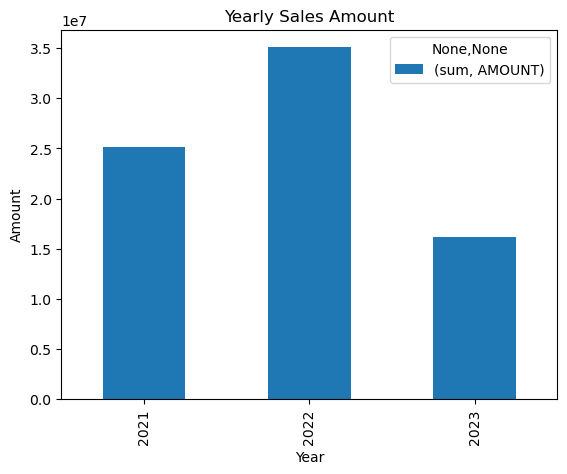

In [3]:
yearly_sales = df.pivot_table(index=df['BEGIN_DATE'].dt.year, values='AMOUNT', aggfunc=['sum', 'count'])
yearly_sales
yearly_sales.plot(kind='bar', y=('sum', 'AMOUNT'), title='Yearly Sales Amount')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

# Monthly Sales Amount

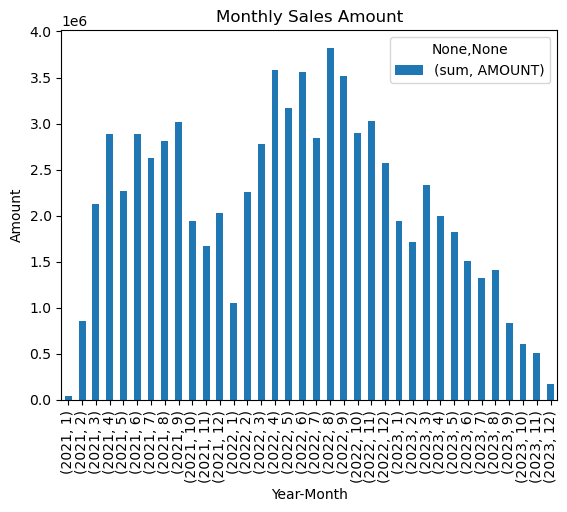

In [4]:
monthly_sales = df.pivot_table(index=[df['BEGIN_DATE'].dt.year, df['BEGIN_DATE'].dt.month], values='AMOUNT', aggfunc=['sum', 'count'])
monthly_sales

monthly_sales.plot(kind='bar', y=('sum', 'AMOUNT'), title='Monthly Sales Amount')
plt.xlabel('Year-Month')
plt.ylabel('Amount')
plt.show()

# Active Customer Distribution by Product Names

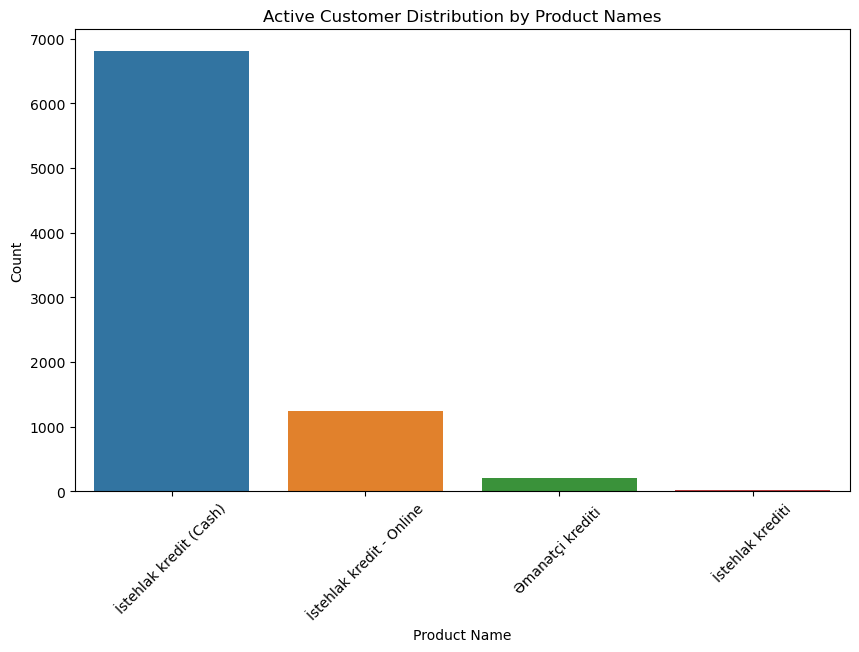

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['CLOSE_DATE'].notnull()], x='PRODUCT_NAME')
plt.title('Active Customer Distribution by Product Names')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of Loan Amounts

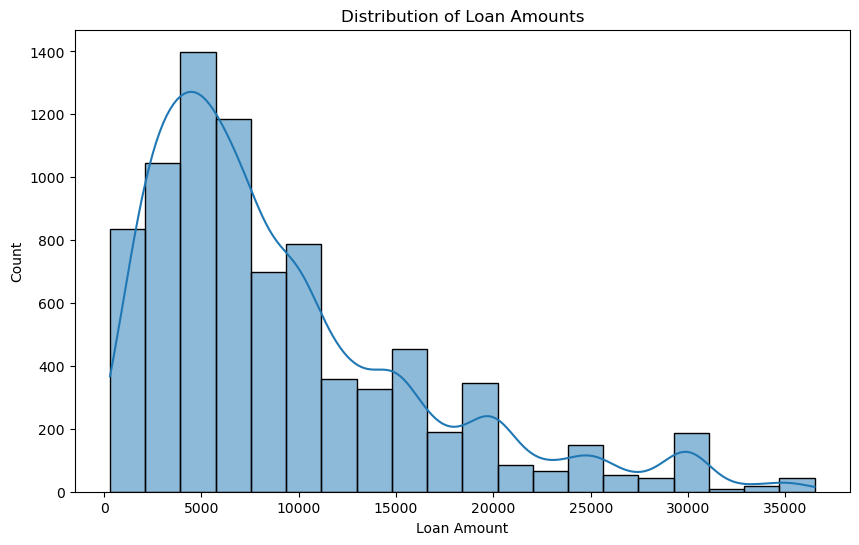

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AMOUNT', bins=20, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

# Distribution of Customer Age

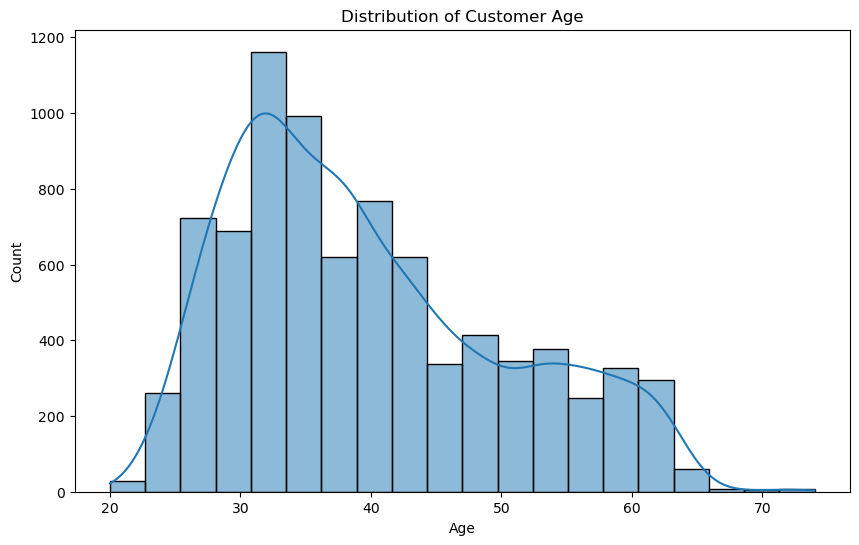

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AGE', bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Loan Amounts by Age Group

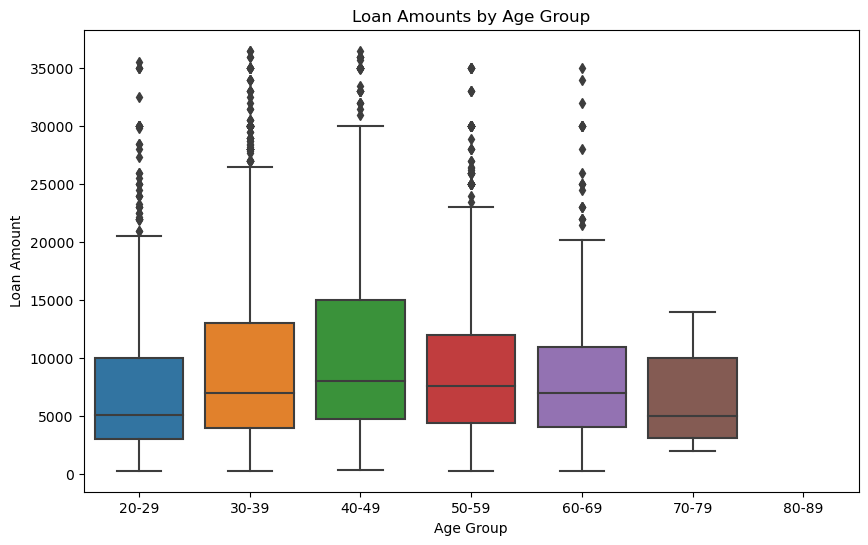

In [8]:
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AGE_GROUP', y='AMOUNT')
plt.title('Loan Amounts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Loan Amount')
plt.show()

# Loan Amount Analysis by Product Name

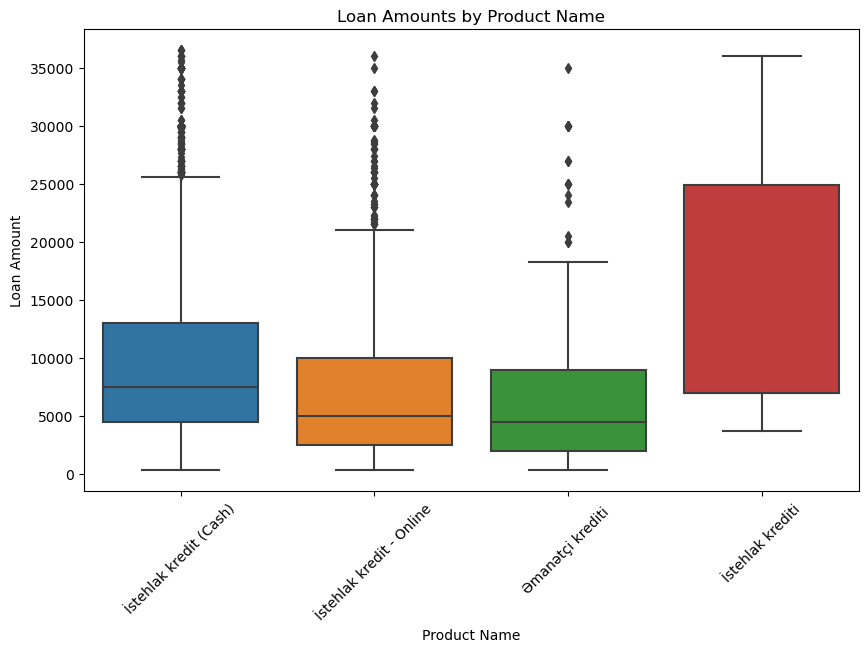

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PRODUCT_NAME', y='AMOUNT')
plt.title('Loan Amounts by Product Name')
plt.xlabel('Product Name')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

# Distribution of Loan Durations

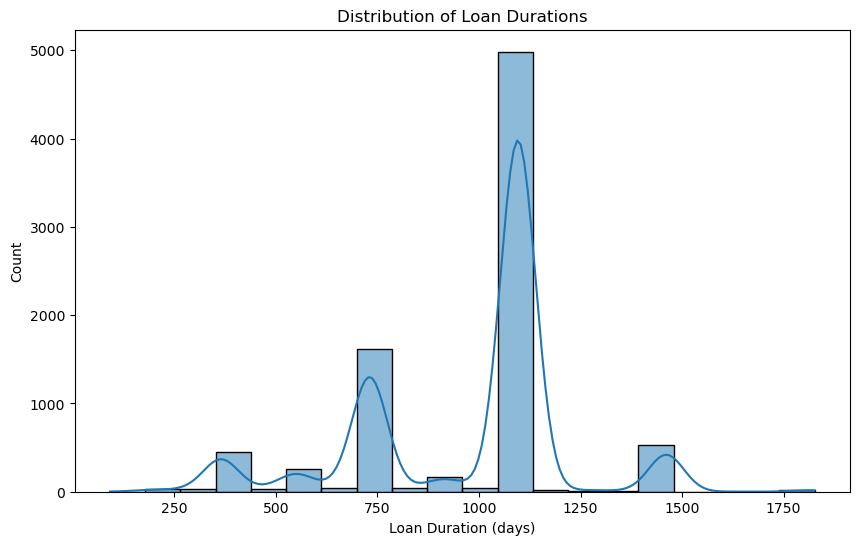

In [10]:
df['LOAN_DURATION'] = (df['END_DATE'] - df['BEGIN_DATE']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='LOAN_DURATION', bins=20, kde=True)
plt.title('Distribution of Loan Durations')
plt.xlabel('Loan Duration (days)')
plt.ylabel('Count')
plt.show()


# Interest Rates by Product Name

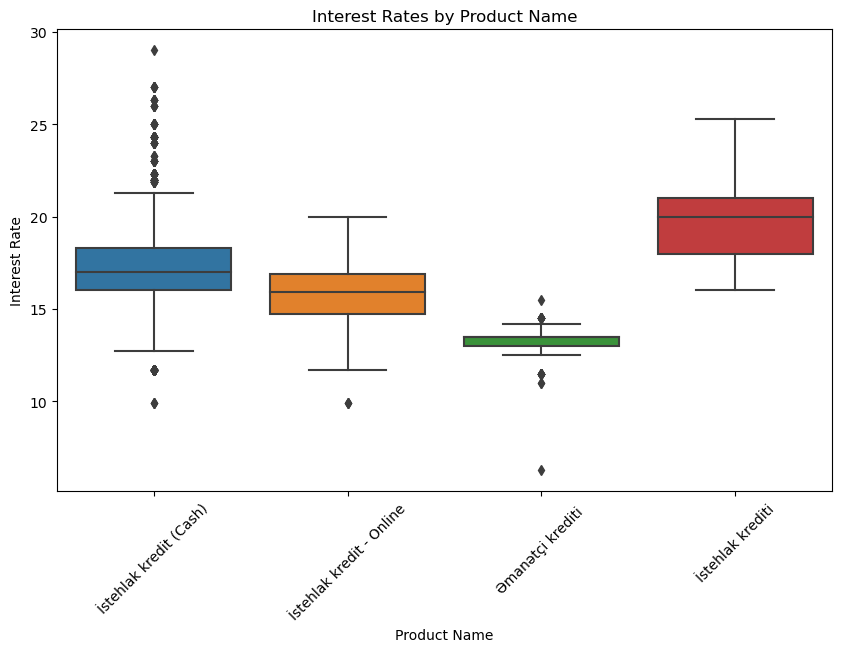

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PRODUCT_NAME', y='INTEREST_RATE')
plt.title('Interest Rates by Product Name')
plt.xlabel('Product Name')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)
plt.show()

# Customer Category Distribution

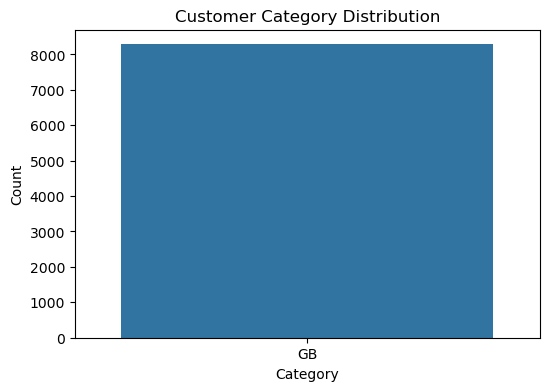

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='CATEGORY')
plt.title('Customer Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Branch Performance Comparison

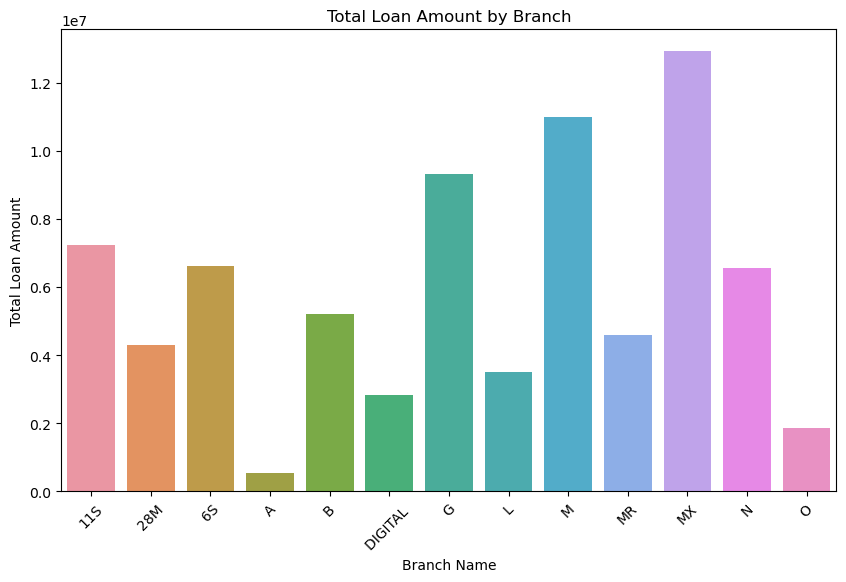

In [13]:
branch_performance = df.groupby('BRANCH_NAME').agg({'AMOUNT': 'sum', 'CUSTOMER_NO': 'count'}).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=branch_performance, x='BRANCH_NAME', y='AMOUNT')
plt.title('Total Loan Amount by Branch')
plt.xlabel('Branch Name')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=45)
plt.show()

# Number of Customers by Branch

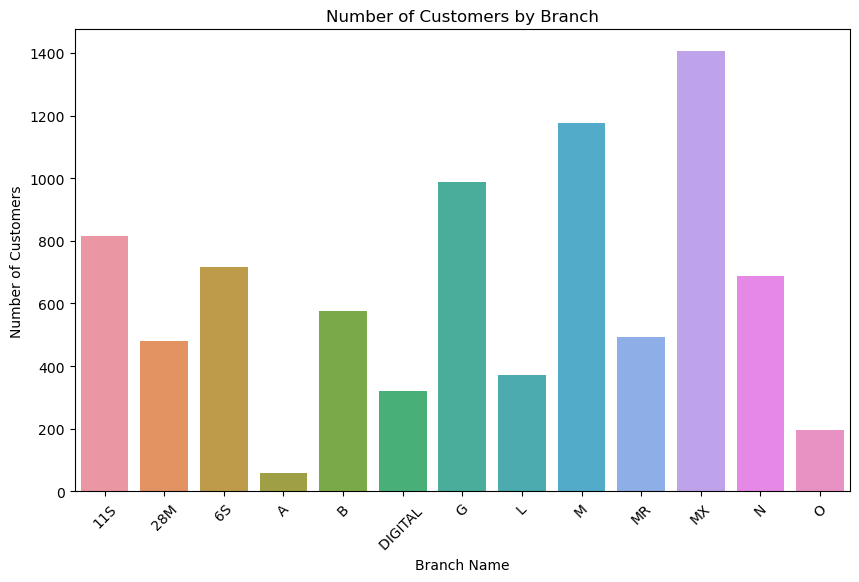

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=branch_performance, x='BRANCH_NAME', y='CUSTOMER_NO')
plt.title('Number of Customers by Branch')
plt.xlabel('Branch Name')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# 3. Segmentation for Loan Offer 🙋🏻🙋🏻‍♂️

In [15]:
# Segmentation
segment = df[(df['AGE'].between(25, 64)) &
             (df['CATEGORY'] != 'BB') &
             (~df['BRANCH_NAME'].str.contains('UPA')) &
             ((df['CLOSE_DATE'].isnull()) | (df['REMAIN_AMOUNT'] < 0.6 * df['AMOUNT']))]
target, test = train_test_split(segment, test_size=0.1, stratify=segment['CATEGORY'])
target['TYPE'] = 'Target'
test['TYPE'] = 'Test'
Segmented_Customers= pd.DataFrame(pd.concat([target, test]))
Segmented_Customers

CUSTOMER_NO BIRTH_DATE BEGIN_DATE   END_DATE CLOSE_DATE BRANCH_NAME  \
9498        563766 1987-10-16 2023-04-13 2027-04-13 2023-10-05           L   
13175       557214 1972-04-10 2022-02-24 2025-02-24 2022-07-14          MR   
16726       575902 1972-10-30 2022-09-16 2025-09-16 2023-05-05          MX   
5151        441549 1993-11-25 2021-11-24 2024-05-24 2023-12-30           B   
8400        482206 1984-06-10 2022-06-08 2025-06-08 2023-04-11           G   
...            ...        ...        ...        ...        ...         ...   
5133        479511 1992-10-20 2023-06-01 2024-06-01 2023-07-06           B   
3757        460657 1987-02-16 2021-04-26 2024-04-26 2021-06-29          6S   
2732        402839 1981-01-09 2022-09-29 2024-09-29 2023-12-04         28M   
541         552662 1992-04-16 2022-02-14 2025-02-14 2022-07-25         11S   
14855       524426 1995-05-23 2023-05-17 2027-05-17 2023-11-16          MX   

       INTEREST_RATE              PRODUCT_NAME   AMOUNT  REMAIN_AMOUNT  \
9498            18.0  İstehlak kredit - Online  22000.0            0.0   
13175           17.0    İstehlak kredit (Cash)   9600.0            0.0   
16726           17.0    İstehlak kredit (Cash)   7000.0            0.0   
5151            18.0    İstehlak kredit (Cash)   6500.0            0.0   
8400            17.0    İstehlak kredit (Cash)  16000.0            0.0   
...              ...                       ...      ...            ...   
5133            11.7  İstehlak kredit - Online    500.0            0.0   
3757            19.9    İstehlak kredit (Cash)   5500.0            0.0   
2732            14.0  İstehlak kredit - Online   7000.0            0.0   
541             16.0    İstehlak kredit (Cash)   6000.0            0.0   
14855           17.5  İstehlak kredit - Online  26000.0            0.0   

      CATEGORY        GSM_NO   AGE AGE_GROUP  LOAN_DURATION    TYPE  
9498        GB  994767005965  36.0     30-39           1461  Target  
13175       GB  994334002070  51.0     50-59           1096  Target  
16726       GB  994758001645  51.0     50-59           1096  Target  
5151        GB  994767002048  30.0     30-39            912  Target  
8400        GB  994767005019  39.0     30-39           1096  Target  
...        ...           ...   ...       ...            ...     ...  
5133        GB  994758003327  31.0     30-39            366    Test  
3757        GB  994758001968  37.0     30-39           1096    Test  
2732        GB  994758002731  43.0     40-49            731    Test  
541         GB  994758000549  31.0     30-39           1096    Test  
14855       GB  994758003329  28.0     20-29           1461    Test  

[8099 rows x 16 columns]

# <center> Task 2

#### SQL task  ==> check attached excel file 

# <center> Task 3

## Insight Finding 📝

Analyze and visualize data and present your findings (preferably PPT)

Prepare the business proposal using data set provided in PYTHON task. Final presentation need to include following insights:


1.	Customer Segmentations and their profile (Exp. Customer between age 25-30 majorly set to require loans between X-Y AZN with Z month period)
2.	Top 3 customer segments which can increase sales if targeted properly. (Exp. Students can be targeted during back to school period as they are not targeted properly and have less risk based on data)
3.	The new bank product to increase the sales and cover customers need. ( Exp. Students credit X AZN with Y period can be attractive and cover majority of customer base.)


###### Note: Business proposal need to be part of business story telling within presentation.

### <center> GOOD LUCK!

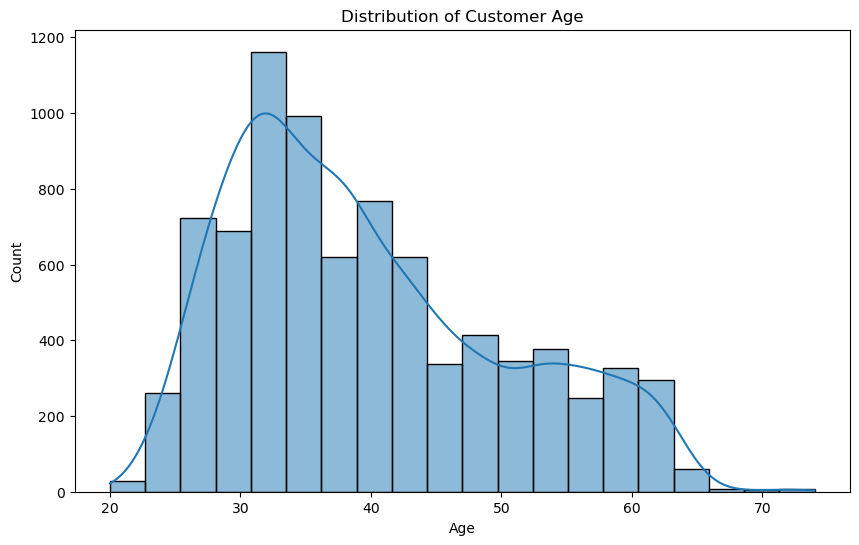

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AGE', bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

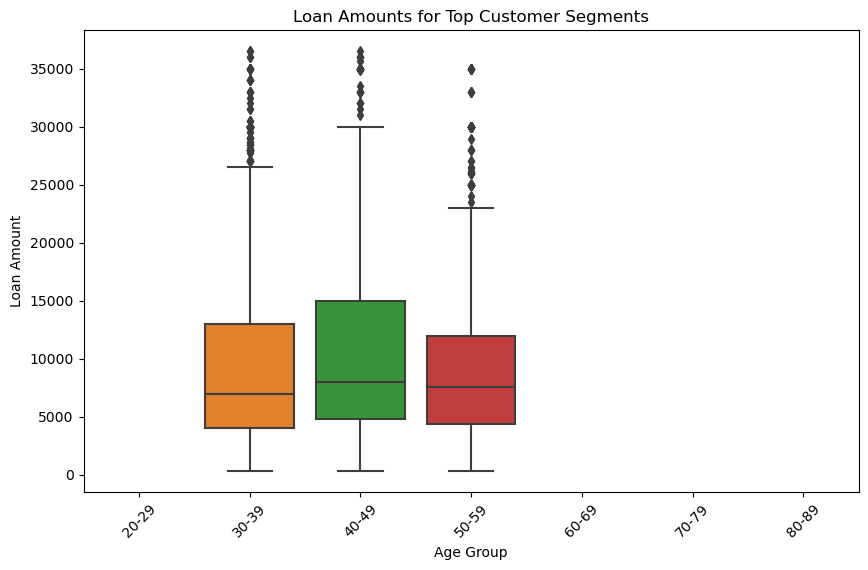

In [17]:
top_segments = df.groupby('AGE_GROUP').agg({'AMOUNT': 'sum'}).sort_values(by='AMOUNT', ascending=False).head(3).index
top_segment_data = df[df['AGE_GROUP'].isin(top_segments)]
plt.figure(figsize=(10, 6))
sns.boxplot(data=top_segment_data, x='AGE_GROUP', y='AMOUNT')
plt.title('Loan Amounts for Top Customer Segments')
plt.xlabel('Age Group')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

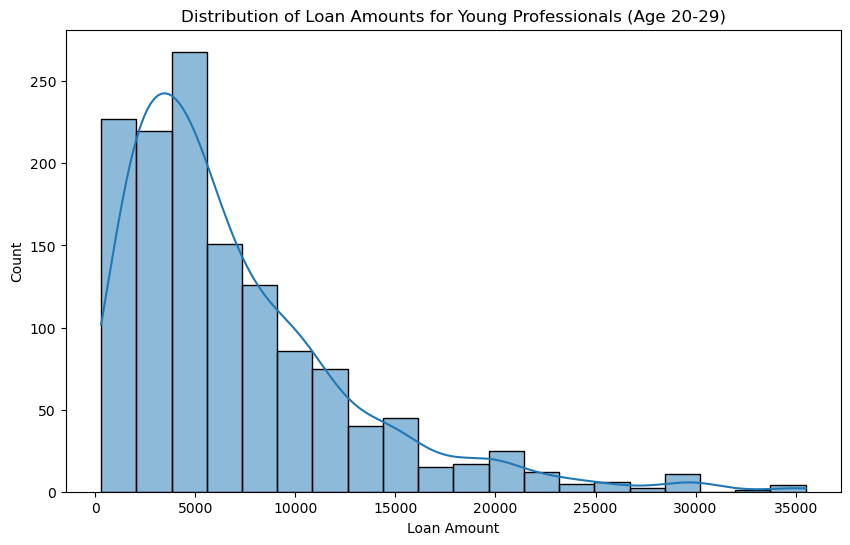

In [18]:
young_professionals = df[df['AGE_GROUP'] == '20-29']
plt.figure(figsize=(10, 6))
sns.histplot(data=young_professionals, x='AMOUNT', bins=20, kde=True)
plt.title('Distribution of Loan Amounts for Young Professionals (Age 20-29)')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

In [20]:
prs = Presentation()
slide_titles = ['Customer Segmentations', 'Top 3 Customer Segments', 'New Bank Product Recommendation']
slide_contents = ['Visualizations and profiles of customer segments.', 'Analysis of top customer segments for sales growth.', 'Proposal for a new bank product to meet customer needs.']
for title, content in zip(slide_titles, slide_contents):
    slide_layout = prs.slide_layouts[1]
    slide = prs.slides.add_slide(slide_layout)
    title_placeholder = slide.placeholders[0]
    title_placeholder.text = title
    content_placeholder = slide.placeholders[1]
    content_placeholder.text = content
prs.save('business_proposal_presentation.pptx')